## Loading of amygdala data

includes some visualizations

### Imports

In [186]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.decomposition import PCA

In [2]:
import pathlib
import h5py

### Figure Settings

In [3]:
from matplotlib import rcParams

rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] = 15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

### Data files

In [6]:
data_path = pathlib.Path("../data/amygdala")
f_mat = list(data_path.rglob('*h5'))
f_mat

[PosixPath('../data/amygdala/data_NIX/Data_Subject_08_Session_01.h5'),
 PosixPath('../data/amygdala/data_NIX/Data_Subject_03_Session_01.h5'),
 PosixPath('../data/amygdala/data_NIX/Data_Subject_05_Session_01.h5'),
 PosixPath('../data/amygdala/data_NIX/Data_Subject_07_Session_01.h5'),
 PosixPath('../data/amygdala/data_NIX/Data_Subject_04_Session_01.h5'),
 PosixPath('../data/amygdala/data_NIX/Data_Subject_01_Session_01.h5'),
 PosixPath('../data/amygdala/data_NIX/Data_Subject_02_Session_01.h5'),
 PosixPath('../data/amygdala/data_NIX/Data_Subject_06_Session_01.h5'),
 PosixPath('../data/amygdala/data_NIX/Data_Subject_09_Session_01.h5')]

### Load data for one trial

In [190]:
with h5py.File(f_mat, "r") as f:
    print(f["data"].keys())
    spike_times = np.array(f["data"]["Data_Subject_01_Session_01"]["data_arrays"]["Spike_Times_Unit_1_uAL_1_Trial_14"]["data"])
    lfp = np.array(f["data"]["Data_Subject_01_Session_01"]["data_arrays"]["iEEG_Data_Trial_14"]["data"])

<KeysViewHDF5 ['Data_Subject_01_Session_01']>


### Trial time

In [91]:
fs = 100
time = np.linspace(0, 24, lfp.shape[-1])
# time = np.arange(lfp.shape[-1]) / fs
time

array([0.00000000e+00, 4.61547337e-04, 9.23094675e-04, ...,
       2.39990769e+01, 2.39995385e+01, 2.40000000e+01])

### Sanity check (ISIs should be larger than 2s)

In [81]:
min_isi = np.diff(spike_times).min()
min_isi

0.0058437500000003695

### Visualize spikes wrt LFP

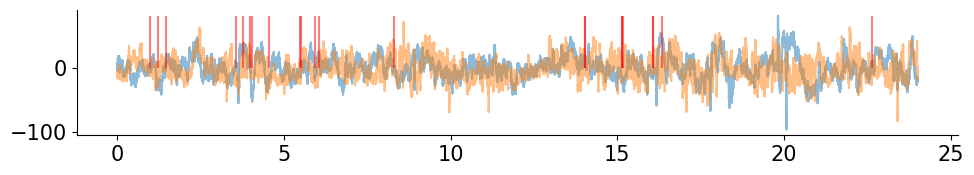

In [92]:
plt.figure(figsize=(10,2))
plt.plot(time, lfp.T, alpha=0.5)
plt.vlines(spike_times, 0, lfp.max(), "r", alpha=0.5)
plt.show()

### Function to crop a prespike window

In [168]:
def crop_prespike_window(lfp, t_spike, time, window_size, channel):
    in_window = (time < t_spike) & (time > t_spike - window_size)
    return lfp[channel, in_window]

def to_sample_idx(t_spike, time):
    return np.argmin((t_spike - time)**2)

def crop_prespike_window(lfp, idx_spike, window_size, channel):
    return lfp[channel, idx_spike-window_size:idx_spike]

### Plot spike triggered LFP

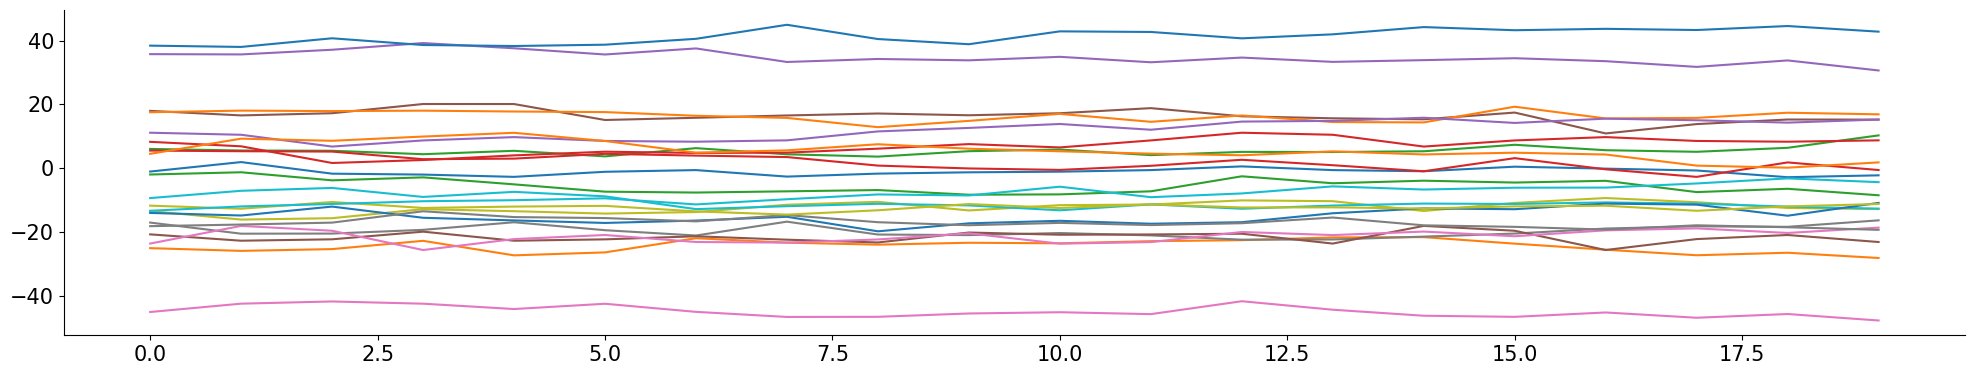

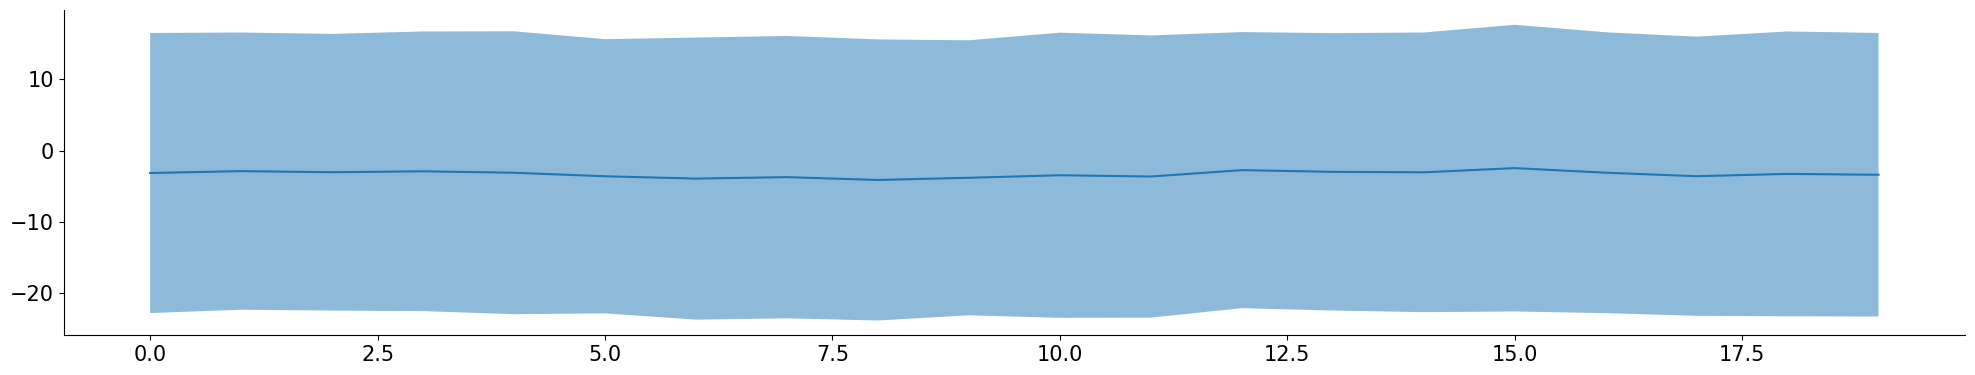

In [187]:
window_size = 20
channel_idx = 0

prespike_lfps = []
for t_spike in spike_times:
    idx_spike = to_sample_idx(t_spike, time)
    prespike_lfps.append(crop_prespike_window(lfp, idx_spike, window_size, channel_idx))
prespike_lfps = np.stack(prespike_lfps)

plt.plot(prespike_lfps.T)
plt.show()

st_avg_lfp = prespike_lfps.mean(0)
st_var_lfp = prespike_lfps.std(0)

plt.plot(st_avg_lfp.T)
plt.fill_between(range(window_size), st_avg_lfp+st_var_lfp, st_avg_lfp-st_var_lfp, alpha=0.5)
plt.show()